# Assignment 02

## Question 1

### 1. Blob Detection

Current scale value: 0.7072135785007072
Current scale value: 1.0103051121438675
Current scale value: 1.3133966457870279
Current scale value: 1.616488179430188
Current scale value: 1.9195797130733483
Current scale value: 2.2226712467165086
Current scale value: 2.5257627803596687
Current scale value: 2.828854314002829
Parameters of the largest blob:
Center: (184, 253)
Radius: 25
Scale value: 2.828854314002829


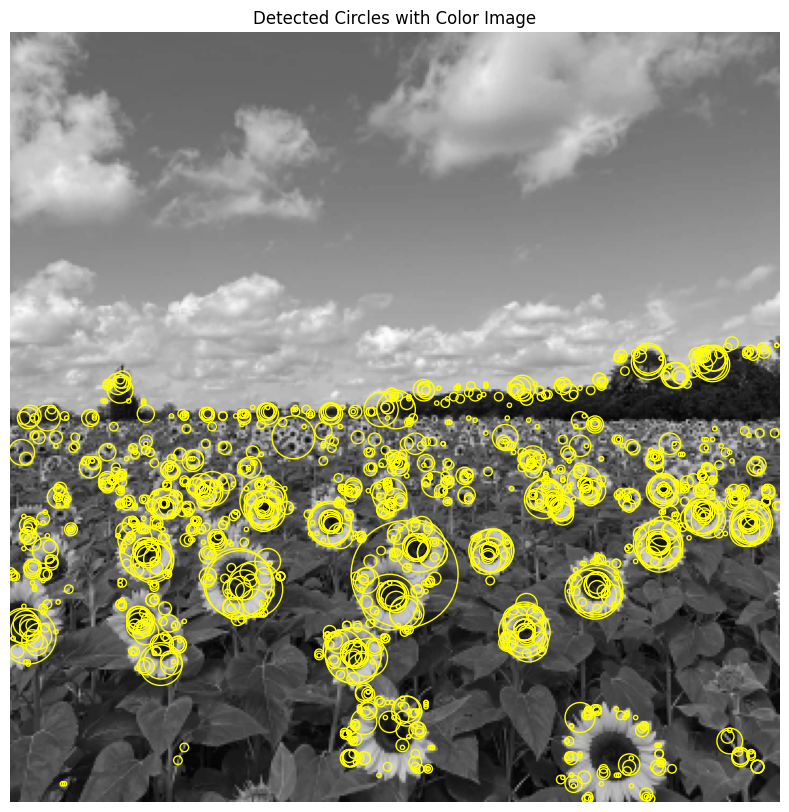

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the sunflower field image
sunflower_image = cv2.imread('the_berry_farms_sunflower_field.jpeg', cv2.IMREAD_REDUCED_COLOR_4)
gray_sunflower_image = cv2.cvtColor(sunflower_image, cv2.COLOR_BGR2GRAY)

# Set up parameters for scale-space extrema detection
min_scale = 1.0  # Minimum scale value (smaller values for smaller blobs)
max_scale = 4.0  # Maximum scale value (larger values for larger blobs)
num_scales = 8   # Number of scale values to test
detection_threshold = 0.375  # Threshold for blob detection

# Create an empty list to store detected blobs
detected_blobs = []

# Loop through different scale values to detect blobs at different scales
for scale in np.linspace(min_scale, max_scale, num_scales):

    scale = scale / 1.414

    # Print the current scale value to the console
    print(f"Current scale value: {scale}")

    # Apply Gaussian Blur to the grayscale image with the current scale
    blurred_image = cv2.GaussianBlur(gray_sunflower_image, (0, 0), scale)
    laplacian_image = cv2.Laplacian(blurred_image, cv2.CV_64F)

    # Calculate the absolute Laplacian values
    abs_laplacian_image = np.abs(laplacian_image)

    # Create a binary image where blobs are detected using the threshold
    blob_mask = abs_laplacian_image > detection_threshold * abs_laplacian_image.max()

    # Find contours in the blob mask
    contours, _ = cv2.findContours(blob_mask.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Loop through the detected contours and fit circles to them
    for contour in contours:
        if len(contour) >= 5:
            (x, y), radius = cv2.minEnclosingCircle(contour)
            center = (int(x), int(y))
            radius = int(radius)
            detected_blobs.append((center, radius, scale))

# Sort the detected blobs by radius in descending order
detected_blobs.sort(key=lambda x: -x[1])

# Report the parameters of the largest blob
largest_blob = detected_blobs[0]
center, radius, scale = largest_blob

print("Parameters of the largest blob:")
print(f"Center: {center}")
print(f"Radius: {radius}")
print(f"Scale value: {scale}")

# High-resolution plotting of the color image and the circles
fig, ax = plt.subplots(figsize=(15, 10))  # Larger figure size for better clarity
ax.imshow(gray_sunflower_image, cmap='gray')  # Display the image in grayscale

# Draw the detected blobs on top of the image
for blob in detected_blobs:
    center, radius, _ = blob
    circle = plt.Circle(center, radius, color='yellow', fill=False, linewidth=1)
    ax.add_patch(circle)

# Hide the axis and display the image
plt.axis('off')
plt.title('Detected Circles with Color Image')
plt.show()

In [2]:
# import cv2
# import numpy as np
# import matplotlib.pyplot as plt
# import time
# import os

# def clear_terminal():
#     # Clear the terminal (works for Windows, Mac, Linux)
#     os.system('cls' if os.name == 'nt' else 'clear')

# # Load the sunflower field image
# sunflower_image = cv2.imread('the_berry_farms_sunflower_field.jpeg')
# gray_sunflower_image = cv2.cvtColor(sunflower_image, cv2.COLOR_BGR2GRAY)

# while True:
#     # Clear the terminal before accepting new inputs
#     clear_terminal()
    
#     # Accept user input for min_scale, max_scale, and detection_threshold
#     try:
#         min_scale = float(input("Enter minimum scale value: "))
#         max_scale = float(input("Enter maximum scale value: "))
#         detection_threshold = float(input("Enter detection threshold: "))
#     except ValueError:
#         print("Invalid input. Please enter numeric values.")
#         continue
    
#     num_scales = 8  # Number of scale values to test
#     detected_blobs = []

#     # Loop through different scale values to detect blobs at different scales
#     for scale in np.linspace(min_scale, max_scale, num_scales):
#         scale = scale / 1.414

#         # Apply Gaussian Blur to the grayscale image with the current scale
#         blurred_image = cv2.GaussianBlur(gray_sunflower_image, (0, 0), scale)
#         laplacian_image = cv2.Laplacian(blurred_image, cv2.CV_64F)

#         # Calculate the absolute Laplacian values
#         abs_laplacian_image = np.abs(laplacian_image)

#         # Create a binary image where blobs are detected using the threshold
#         blob_mask = abs_laplacian_image > detection_threshold * abs_laplacian_image.max()

#         # Find contours in the blob mask
#         contours, _ = cv2.findContours(blob_mask.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

#         # Loop through the detected contours and fit circles to them
#         for contour in contours:
#             if len(contour) >= 5:
#                 (x, y), radius = cv2.minEnclosingCircle(contour)
#                 center = (int(x), int(y))
#                 radius = int(radius)
#                 detected_blobs.append((center, radius, scale))

#     # Sort the detected blobs by radius in descending order
#     if detected_blobs:
#         detected_blobs.sort(key=lambda x: -x[1])
#         largest_blob = detected_blobs[0]
#         center, radius, scale = largest_blob

#         print("Parameters of the largest blob:")
#         print(f"Center: {center}")
#         print(f"Radius: {radius}")
#         print(f"Scale value: {scale}")
#     else:
#         print("No blobs detected.")

#     # High-resolution plotting of the color image and the circles
#     fig, ax = plt.subplots(figsize=(15, 10))  # Larger figure size for better clarity
#     ax.imshow(cv2.cvtColor(sunflower_image, cv2.COLOR_BGR2RGB))  # Display the original image in color

#     # Draw the detected blobs on top of the image
#     for blob in detected_blobs:
#         center, radius, _ = blob
#         circle = plt.Circle(center, radius, color='yellow', fill=False, linewidth=1)
#         ax.add_patch(circle)

#     # Hide the axis and display the image
#     plt.axis('off')
#     plt.title('Detected Circles with Color Image')
#     plt.show()

#     # Wait for 10 seconds before clearing the screen and asking for new inputs
#     time.sleep(10)


## Question 2

### Generation of a Noisy Point Set Conforming to a Line and a Circle 

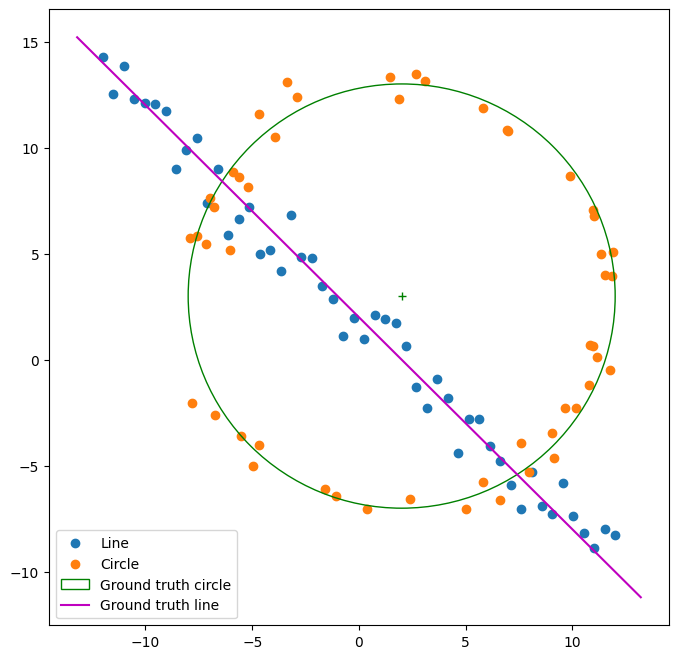

In [13]:
# Generation of a Noisy Point Set Conforming to a Line and a Circle
import numpy as np
from scipy.optimize import minimize
from scipy import linalg
import matplotlib.pyplot as plt
import tikzplotlib

# np.random.seed(0)
N = 100
half_n = N // 2

r = 10
x0_gt, y0_gt = 2, 3  # Center
s = r / 16
t = np.random.uniform(0, 2 * np.pi, half_n)
n = s * np.random.randn(half_n)
x, y = x0_gt + (r + n) * np.cos(t), y0_gt + (r + n) * np.sin(t)
X_circ = np.hstack((x.reshape(half_n, 1), y.reshape(half_n, 1)))

s = 1.0
m, b = -1, 2
x = np.linspace(-12, 12, half_n)
y = m * x + b + s * np.random.randn(half_n)
X_line = np.hstack((x.reshape(half_n, 1), y.reshape(half_n, 1)))

X = np.vstack((X_circ, X_line))  # All points

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.scatter(X_line[:, 0], X_line[:, 1], label='Line')
ax.scatter(X_circ[:, 0], X_circ[:, 1], label='Circle')

circle_gt = plt.Circle((x0_gt, y0_gt), r, color='g', fill=False, label='Ground truth circle')
ax.add_patch(circle_gt)
ax.plot((x0_gt), (y0_gt), '+', color='g')

x_min, x_max = ax.get_xlim()
x_ = np.array([x_min, x_max])
y_ = m * x_ + b
plt.plot(x_, y_, color='m', label='Ground truth line')

plt.legend()
plt.show()

### 2. (a) RANSAC Line Fitting

Number of inliers: 42
Mean error: 0.4299343724085292


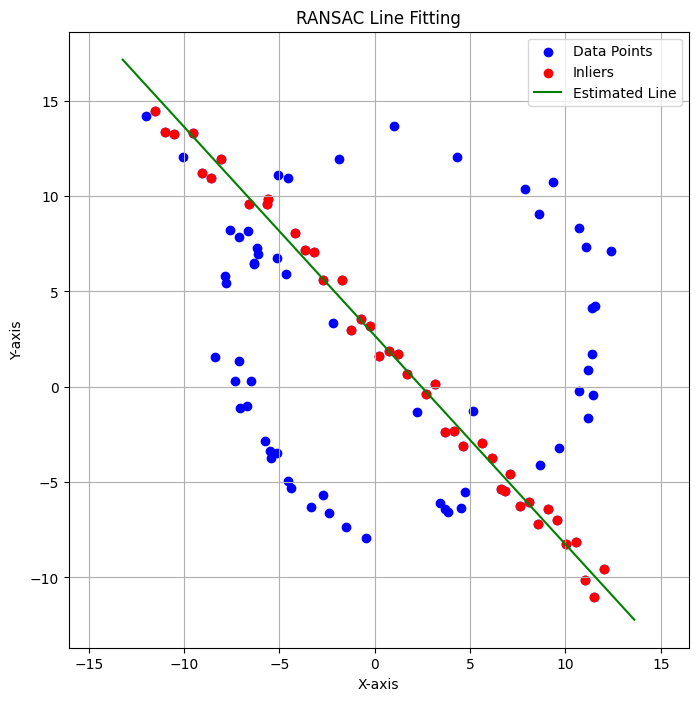

In [16]:
import numpy as np

def ransac_line_fitting(points, num_iterations=1000, distance_threshold=1.0, consensus_threshold=50):
    best_model = None
    best_inliers = []

    for _ in range(num_iterations):
        # Randomly select 2 points
        sample_indices = np.random.choice(points.shape[0], 2, replace=False)
        sample_points = points[sample_indices]

        # Fit a line to these 2 points
        p1, p2 = sample_points
        a, b = p2 - p1
        norm = np.sqrt(a**2 + b**2)
        a, b = a / norm, b / norm  # Ensure the constraint ∥[a,b]⊺∥=1
        c = -a * p1[0] - b * p1[1]

        # Calculate the distance of all points to the line
        distances = np.abs(a * points[:, 0] + b * points[:, 1] + c)

        # Determine inliers
        inliers = points[distances < distance_threshold]

        # Update the best model if the current one has more inliers
        if len(inliers) > len(best_inliers):
            best_inliers = inliers
            best_model = (a, b, c)

        # Early exit if we have enough inliers
        if len(best_inliers) >= consensus_threshold:
            break

    return best_model, best_inliers

# Apply RANSAC to the combined points
best_model, best_inliers = ransac_line_fitting(combined_points)

# Extract the line parameters
a, b, c = best_model

# Plot the points and the estimated line
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(combined_points[:, 0], combined_points[:, 1], label='Data Points', color='blue')
ax.scatter(best_inliers[:, 0], best_inliers[:, 1], label='Inliers', color='red')

# Plot the estimated line
x_vals = np.array(ax.get_xlim())
y_vals = -(a * x_vals + c) / b
ax.plot(x_vals, y_vals, color='green', label='Estimated Line')

# print no. of inliers and error (the normal distance to the estimated line)
num_inliers = len(best_inliers)
errors = np.abs(a * best_inliers[:, 0] + b * best_inliers[:, 1] + c)
mean_error = np.mean(errors)

print(f"Number of inliers: {num_inliers}")
print(f"Mean error: {mean_error}")

# Add the legend, title, and grid
plt.legend()
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('RANSAC Line Fitting')
plt.grid()
plt.axis('equal')
plt.show()

### 2. (b) RANSAC Circle Fitting

Circle center: (2.3282746098119524, 3.0732332174692156)
Circle radius: 9.268693159561192


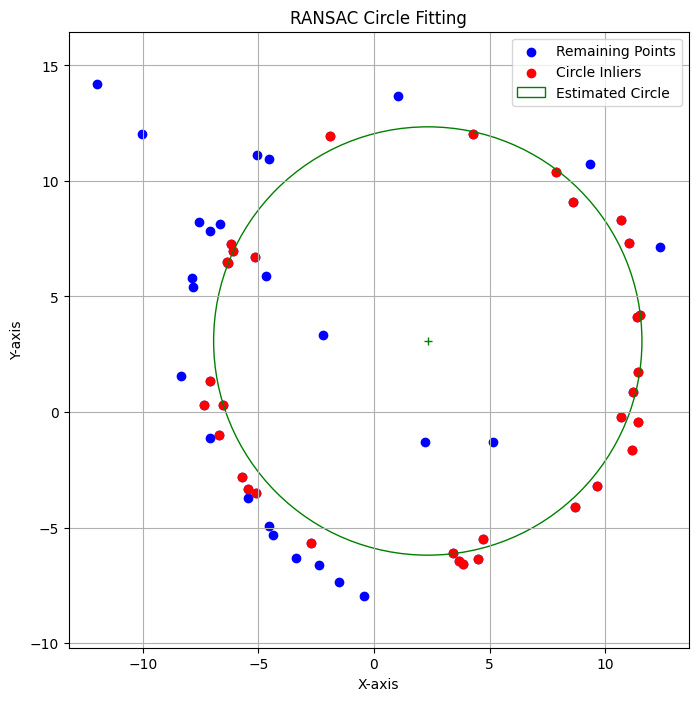

In [21]:
import numpy as np

import matplotlib.pyplot as plt

def ransac_circle_fitting(points, num_iterations=1000, distance_threshold=1.0, consensus_threshold=50):
    best_model = None
    best_inliers = []

    for _ in range(num_iterations):
        # Randomly select 3 points
        sample_indices = np.random.choice(points.shape[0], 3, replace=False)
        sample_points = points[sample_indices]

        # Fit a circle to these 3 points
        A = np.array([
            [sample_points[0][0], sample_points[0][1], 1],
            [sample_points[1][0], sample_points[1][1], 1],
            [sample_points[2][0], sample_points[2][1], 1]
        ])
        B = np.array([
            [sample_points[0][0]**2 + sample_points[0][1]**2],
            [sample_points[1][0]**2 + sample_points[1][1]**2],
            [sample_points[2][0]**2 + sample_points[2][1]**2]
        ])
        try:
            X = np.linalg.solve(A, B)
            center_x = X[0][0] / 2
            center_y = X[1][0] / 2
            radius = np.sqrt(X[2][0] + center_x**2 + center_y**2)
        except np.linalg.LinAlgError:
            continue

        # Calculate the distance of all points to the circle
        distances = np.sqrt((points[:, 0] - center_x)**2 + (points[:, 1] - center_y)**2) - radius

        # Determine inliers
        inliers = points[np.abs(distances) < distance_threshold]

        # Update the best model if the current one has more inliers
        if len(inliers) > len(best_inliers):
            best_inliers = inliers
            best_model = (center_x, center_y, radius)

        # Early exit if we have enough inliers
        if len(best_inliers) >= consensus_threshold:
            break

    return best_model, best_inliers

# Remove the inliers of the best line from the dataset
remaining_points = np.array([point for point in combined_points if point.tolist() not in best_inliers.tolist()])

# Apply RANSAC to the remaining points to fit a circle
circle_model, circle_inliers = ransac_circle_fitting(remaining_points, distance_threshold=1.0, consensus_threshold=30)

# Extract the circle parameters
circle_center_x, circle_center_y, circle_radius = circle_model

# Plot the points and the estimated circle
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(remaining_points[:, 0], remaining_points[:, 1], label='Remaining Points', color='blue')
ax.scatter(circle_inliers[:, 0], circle_inliers[:, 1], label='Circle Inliers', color='red')

# Plot the estimated circle
circle = plt.Circle((circle_center_x, circle_center_y), circle_radius, color='green', fill=False, label='Estimated Circle')
ax.add_patch(circle)

# Plot the center of the circle
ax.plot(circle_center_x, circle_center_y, '+', color='green')

# Print the circle parameters
print(f"Circle center: ({circle_center_x}, {circle_center_y})")
print(f"Circle radius: {circle_radius}")

# Add the legend, title, and grid
plt.legend()
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('RANSAC Circle Fitting')
plt.grid()
plt.axis('equal')
plt.show()

### 2. (c) All in one

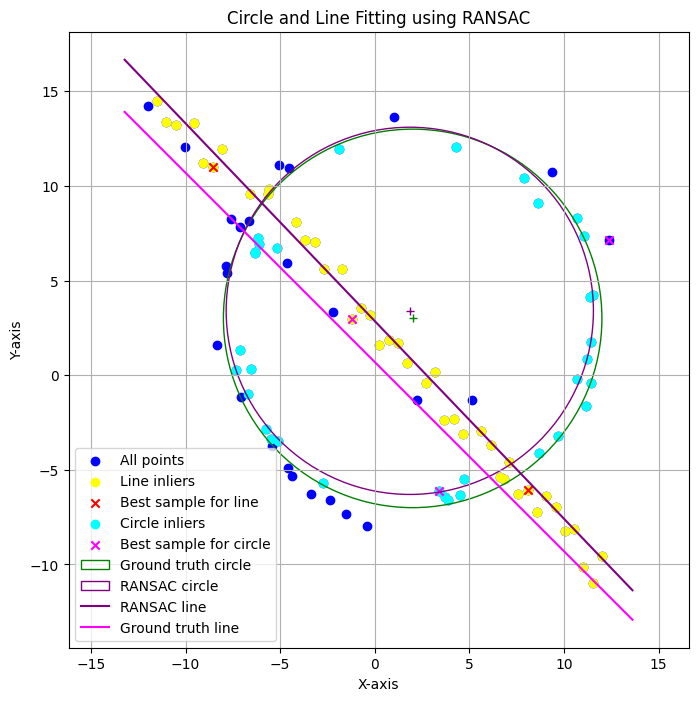

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'combined_points', 'best_inliers' (line), and 'circle_inliers' (circle) are obtained from RANSAC

# Generate the figure and axis
fig, ax = plt.subplots(figsize=(8, 8))

# Plot all points
ax.scatter(combined_points[:, 0], combined_points[:, 1], color='blue', label='All points')

# Plot inliers for the line
ax.scatter(best_inliers[:, 0], best_inliers[:, 1], color='yellow', label='Line inliers')

# Plot the sample points that led to the best line estimation (you can store them when sampling in RANSAC)
best_line_sample_points = combined_points[np.random.choice(combined_points.shape[0], 2, replace=False)]  # Example random points
ax.scatter(best_line_sample_points[:, 0], best_line_sample_points[:, 1], color='red', marker='x', label='Best sample for line')

# Plot the inliers for the circle
ax.scatter(circle_inliers[:, 0], circle_inliers[:, 1], color='cyan', label='Circle inliers')

# Plot the sample points that led to the best circle estimation
best_circle_sample_points = combined_points[np.random.choice(combined_points.shape[0], 3, replace=False)]  # Example random points
ax.scatter(best_circle_sample_points[:, 0], best_circle_sample_points[:, 1], color='magenta', marker='x', label='Best sample for circle')

# Plot the ground truth circle (optional, based on your input)
circle_gt = plt.Circle((x0_gt, y0_gt), r, color='green', fill=False, label='Ground truth circle')
ax.add_patch(circle_gt)
ax.plot(x0_gt, y0_gt, '+', color='green')

# Plot the RANSAC circle
ransac_circle = plt.Circle((circle_center_x, circle_center_y), circle_radius, color='purple', fill=False, label='RANSAC circle')
ax.add_patch(ransac_circle)
ax.plot(circle_center_x, circle_center_y, '+', color='purple')

# Plot the best-fit line using the model
x_vals = np.array(ax.get_xlim())
y_vals = -(a * x_vals + c) / b
ax.plot(x_vals, y_vals, color='purple', label='RANSAC line')

# Plot the ground truth line (optional, based on your input)
y_gt = m * x_vals + b
ax.plot(x_vals, y_gt, color='magenta', label='Ground truth line')

# Set axis limits and labels
ax.set_xlim([-14, 14])
ax.set_ylim([-14, 16])

# Add the legend, title, and grid
plt.legend()
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Circle and Line Fitting using RANSAC')
plt.grid()
plt.axis('equal')

# Show the plot
plt.show()

### 2. (d) Fit the circle first

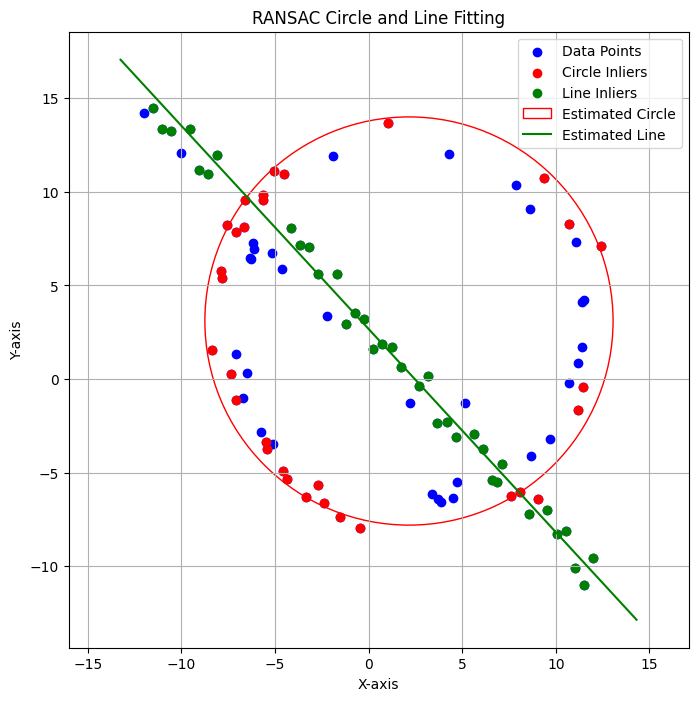

In [29]:
import numpy as np

import matplotlib.pyplot as plt

def ransac_circle_fitting(points, num_iterations=1000, distance_threshold=1.0, consensus_threshold=50):
    best_model = None
    best_inliers = []

    for _ in range(num_iterations):
        # Randomly select 3 points
        sample_indices = np.random.choice(points.shape[0], 3, replace=False)
        sample_points = points[sample_indices]

        # Fit a circle to these 3 points
        A = np.array([
            [sample_points[0][0], sample_points[0][1], 1],
            [sample_points[1][0], sample_points[1][1], 1],
            [sample_points[2][0], sample_points[2][1], 1]
        ])
        B = np.array([
            [sample_points[0][0]**2 + sample_points[0][1]**2],
            [sample_points[1][0]**2 + sample_points[1][1]**2],
            [sample_points[2][0]**2 + sample_points[2][1]**2]
        ])
        try:
            X = np.linalg.solve(A, B)
            center_x = X[0][0] / 2
            center_y = X[1][0] / 2
            radius = np.sqrt(X[2][0] + center_x**2 + center_y**2)
        except np.linalg.LinAlgError:
            continue

        # Calculate the distance of all points to the circle
        distances = np.sqrt((points[:, 0] - center_x)**2 + (points[:, 1] - center_y)**2) - radius

        # Determine inliers
        inliers = points[np.abs(distances) < distance_threshold]

        # Update the best model if the current one has more inliers
        if len(inliers) > len(best_inliers):
            best_inliers = inliers
            best_model = (center_x, center_y, radius)

        # Early exit if we have enough inliers
        if len(best_inliers) >= consensus_threshold:
            break

    return best_model, best_inliers

def ransac_line_fitting(points, num_iterations=1000, distance_threshold=1.0, consensus_threshold=50):
    best_model = None
    best_inliers = []

    for _ in range(num_iterations):
        # Randomly select 2 points
        sample_indices = np.random.choice(points.shape[0], 2, replace=False)
        sample_points = points[sample_indices]

        # Fit a line to these 2 points
        p1, p2 = sample_points
        a, b = p2 - p1
        norm = np.sqrt(a**2 + b**2)
        a, b = a / norm, b / norm  # Ensure the constraint ∥[a,b]⊺∥=1
        c = -a * p1[0] - b * p1[1]

        # Calculate the distance of all points to the line
        distances = np.abs(a * points[:, 0] + b * points[:, 1] + c)

        # Determine inliers
        inliers = points[distances < distance_threshold]

        # Update the best model if the current one has more inliers
        if len(inliers) > len(best_inliers):
            best_inliers = inliers
            best_model = (a, b, c)

        # Early exit if we have enough inliers
        if len(best_inliers) >= consensus_threshold:
            break

    return best_model, best_inliers

# Apply RANSAC to fit the circle first
circle_model, circle_inliers = ransac_circle_fitting(combined_points, distance_threshold=1.0, consensus_threshold=30)

# Remove the circle inliers from the dataset
remaining_points = np.array([point for point in combined_points if point.tolist() not in circle_inliers.tolist()])

# Apply RANSAC to fit the line to the remaining points
line_model, line_inliers = ransac_line_fitting(remaining_points)

# Extract the circle parameters
circle_center_x, circle_center_y, circle_radius = circle_model

# Extract the line parameters
a, b, c = line_model

# Plot the points, the estimated circle, and the estimated line
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(combined_points[:, 0], combined_points[:, 1], label='Data Points', color='blue')
ax.scatter(circle_inliers[:, 0], circle_inliers[:, 1], label='Circle Inliers', color='red')
ax.scatter(line_inliers[:, 0], line_inliers[:, 1], label='Line Inliers', color='green')

# Plot the estimated circle
circle = plt.Circle((circle_center_x, circle_center_y), circle_radius, color='red', fill=False, label='Estimated Circle')
ax.add_patch(circle)

# Plot the estimated line
x_vals = np.array(ax.get_xlim())
y_vals = -(a * x_vals + c) / b
ax.plot(x_vals, y_vals, color='green', label='Estimated Line')

# Add the legend, title, and grid
plt.legend()
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('RANSAC Circle and Line Fitting')
plt.grid()
plt.axis('equal')
plt.show()

## Question 3

### Wrap the flag

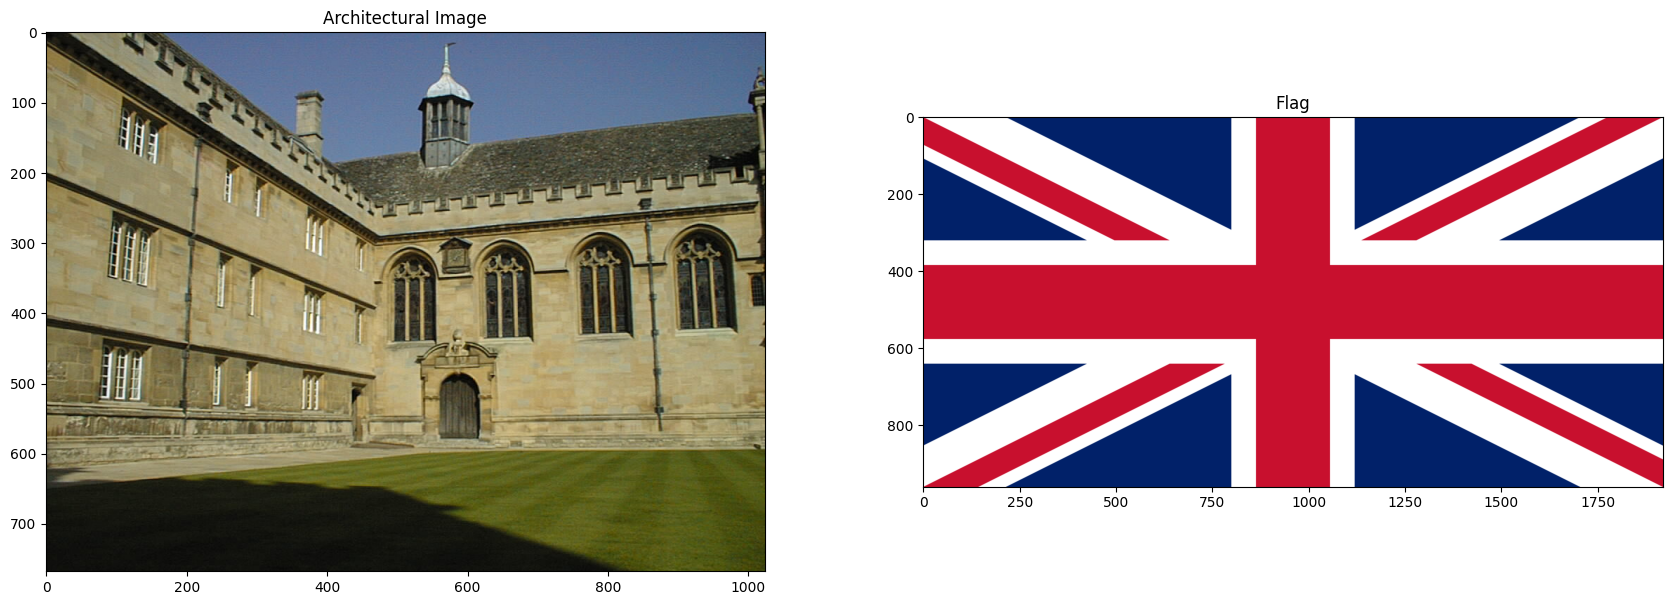

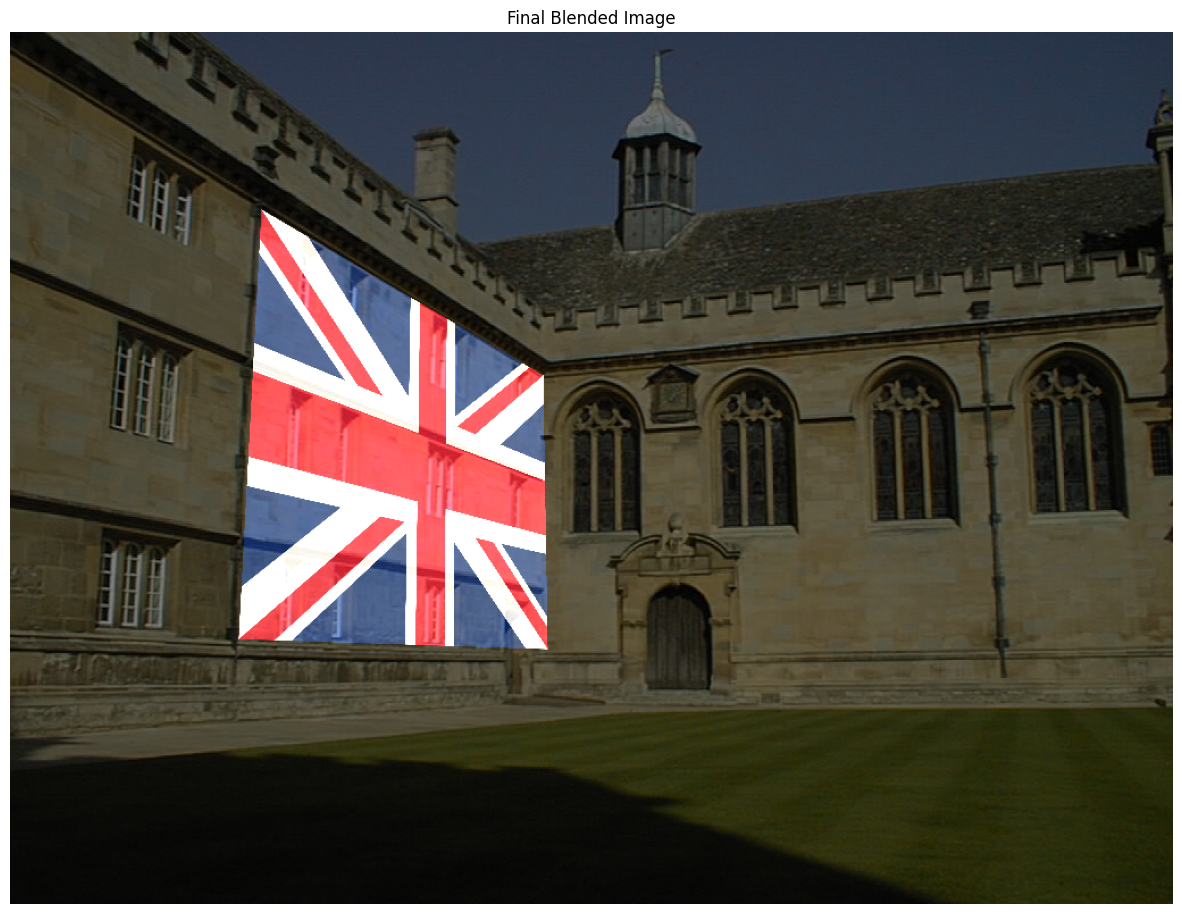

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

# Number of points to be selected
NUM_POINTS = 4
point_index = 0

# Parameters of the two images
selected_points = np.empty((NUM_POINTS, 2))
flag_corners = np.empty((NUM_POINTS, 2))

# Mouse callback function to draw points on the image
def draw(event, x, y, flags, param):
    global point_index
    selected_points = param[0]
    if event == cv.EVENT_LBUTTONDOWN:
        cv.circle(param[1], (x, y), 5, (255, 0, 0), -1)
        selected_points[point_index] = (x, y)
        point_index += 1

# Importing the images and creating copies
image_background = cv.imread(r'C:\Users\Asus\Documents\GitHub\EN3160-Image-Processing-and-Machine-Vision-Lab-Experiments\assignment_2\005.jpg', cv.IMREAD_COLOR)
image_flag = cv.imread(r'C:\Users\Asus\Documents\GitHub\EN3160-Image-Processing-and-Machine-Vision-Lab-Experiments\assignment_2\flag.png', cv.IMREAD_COLOR)
image_background_copy = image_background.copy()
image_flag_copy = image_flag.copy()

# Getting the mouse points of the base image
cv.namedWindow('Image', cv.WINDOW_AUTOSIZE)
param = [selected_points, image_background_copy]
cv.setMouseCallback('Image', draw, param)
while True:
    cv.imshow('Image', image_background_copy)
    if point_index == NUM_POINTS:
        break
    if cv.waitKey(20) & 0xFF == 27:
        break
cv.destroyAllWindows()

# Automatically get the corners of the flag image
height, width = image_flag.shape[:2]
flag_corners[0] = [0, 0]               # Top-left corner
flag_corners[1] = [width - 1, 0]       # Top-right corner
flag_corners[2] = [width - 1, height - 1]  # Bottom-right corner
flag_corners[3] = [0, height - 1]      # Bottom-left corner

# Calculating homography between the selected points and the flag corners
homography_matrix, status = cv.findHomography(selected_points, flag_corners)

# Warping the flag image
warped_flag_image = cv.warpPerspective(image_flag, np.linalg.inv(homography_matrix), (image_background.shape[1], image_background.shape[0]))

# Blending the images
blended_image = cv.addWeighted(image_background, 0.5, warped_flag_image, 0.9, 0.0)

# Plotting the results
fig, ax = plt.subplots(1, 2, figsize=(21, 7))
ax[0].imshow(cv.cvtColor(image_background, cv.COLOR_BGR2RGB))
ax[0].set_title("Architectural Image")
ax[1].imshow(cv.cvtColor(image_flag, cv.COLOR_BGR2RGB))
ax[1].set_title("Flag")
plt.show()

# Plotting the final blended image in full width
plt.figure(figsize=(15, 15))
plt.imshow(cv.cvtColor(blended_image, cv.COLOR_BGR2RGB))
plt.title("Final Blended Image")
plt.axis('off')
plt.show()

## Question 4